In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('Preprocessed Data.csv')
df.head()

,Text,Link,Câu trả lời,TTHC,Ministry,Câu_hỏi_sạch,Câu_trả_lời_sạch,Tên_TTHC,Tên_cơ_quan_thực_hiện
0,Cá nhân đăng ký Bồi dưỡng nghiệp vụ đăng kiểm ...,https://dichvucong.gov.vn/p/home/dvc-chi-tiet-...,"Theo quy định tại Khoản 3, Điều 8 Thông tư số ...","{'Tên': ['Cấp, cấp lại thẻ, dấu kỹ thuật đăng ...",Bộ Nông nghiệp và Phát triển nông thôn,cá nhân đăng ký bồi dưỡng nghiệp vụ đăng kiểm ...,theo quy định tại khoản 3 điều 8 thông tư số 2...,"['Cấp, cấp lại thẻ, dấu kỹ thuật đăng kiểm viê...",[['Cục Thủy sản - Bộ NN-PTNT']]
1,"Khi nào các tổ chức, cá nhân có thể gửi đề xuấ...",https://dichvucong.gov.vn/p/home/dvc-chi-tiet-...,Định kỳ hàng năm theo thông báo trên trang thô...,{'Tên': ['Phê duyệt danh mục đề tài khoa học v...,Bộ Nông nghiệp và Phát triển nông thôn,khi nào các tổ chức cá nhân có thể gửi đề xuất...,định kỳ hàng năm theo thông báo trên trang thô...,['Phê duyệt danh mục đề tài khoa học và công n...,[['Vụ khoa học công nghệ và môi trường']]
2,Điều kiện công nhận đối với TBKT công nghệ sin...,https://dichvucong.gov.vn/p/home/dvc-chi-tiet-...,Theo Điều 6 Thông tư số 23/2010/TT-BNNPTNT ngà...,{'Tên': ['Công nhận tiến bộ kỹ thuật công nghệ...,Bộ Nông nghiệp và Phát triển nông thôn,điều kiện công nhận đối với tbkt công nghệ sin...,theo điều 6 thông tư số 23/2010/tt bnnptnt ngà...,['Công nhận tiến bộ kỹ thuật công nghệ sinh học'],[['Vụ khoa học công nghệ và môi trường']]
3,Cách thức thực hiện việc gửi đề xuất nhiệm vụ ...,https://dichvucong.gov.vn/p/home/dvc-chi-tiet-...,Đề xuất nhiệm vụ KHCN có thể gửi trực tiếp tại...,{'Tên': ['Phê duyệt danh mục đề tài khoa học v...,Bộ Nông nghiệp và Phát triển nông thôn,cách thức thực hiện việc gửi đề xuất nhiệm vụ ...,đề xuất nhiệm vụ khcn có thể gửi trực tiếp tại...,['Phê duyệt danh mục đề tài khoa học và công n...,[['Vụ khoa học công nghệ và môi trường']]
4,Hồ sơ đề nghị thu hồi Giấy chứng nhận cơ sở đủ...,https://dichvucong.gov.vn/p/home/dvc-chi-tiet-...,"Theo quy định tại Khoản 4, Điều 54 của Nghị đị...","{'Tên': ['Cấp, cấp lại giấy chứng nhận cơ sở đ...",Bộ Nông nghiệp và Phát triển nông thôn,hồ sơ đề nghị thu hồi giấy chứng nhận cơ sở đủ...,theo quy định tại khoản 4 điều 54 của nghị địn...,"['Cấp, cấp lại giấy chứng nhận cơ sở đủ điều k...",[['Cơ quan quản lý nhà nước về thủy sản cấp tỉ...


In [ ]:
api_key = "YOUR API KEY HERE"

import google.generativeai as genai

genai.configure(api_key=api_key)

gem = genai.GenerativeModel('gemini-2.0-flash')

i = 0
knowledge = str(df.TTHC[i])
topic = df.Ministry[i]
question = df.Text[i]
answer = df['Câu trả lời'][i]

text = f'''Bạn sẽ đóng vai trò là một trình tạo câu trả lời sai (hallucinated answer generator). Với một câu hỏi, câu trả lời đúng và kiến thức liên quan, mục tiêu của bạn là viết một câu trả lời nghe có vẻ rất hợp lý nhưng thực tế lại sai.
Chỉ trả lời theo yêu cầu mà không nhắc lại hướng dẫn hoặc lưu ý gì khác.

#Chủ đề#: {topic}
#Kiến thức#: {knowledge}
#Câu hỏi#: {question}
#Câu trả lời đúng#: {answer}
#Câu trả lời bịa đặt#: 
'''

output = gem.generate_content(text).text

from IPython.display import Markdown

Markdown(output)

Để đăng ký bồi dưỡng nghiệp vụ đăng kiểm viên tàu cá, cá nhân cần chuẩn bị:

1.  **Sơ yếu lý lịch:** Có xác nhận của địa phương nơi cư trú, thể hiện rõ quá trình công tác và kinh nghiệm liên quan đến lĩnh vực tàu cá.
2.  **Giấy chứng nhận sức khỏe:** Được cấp bởi cơ sở y tế có thẩm quyền, chứng minh đủ sức khỏe để tham gia khóa bồi dưỡng và thực hiện công việc đăng kiểm.
3.  **Bản sao bằng tốt nghiệp:** Cần có bản sao công chứng bằng tốt nghiệp đại học chuyên ngành kỹ thuật tàu thủy hoặc các ngành liên quan đến cơ khí, điện, điện tử hàng hải.
4.  **Chứng chỉ nghiệp vụ:** Nếu có chứng chỉ liên quan đến lĩnh vực đăng kiểm hoặc quản lý kỹ thuật tàu cá, cần nộp bản sao công chứng.
5.  **Giấy giới thiệu:** Từ cơ quan, tổ chức nơi đang công tác (nếu có).
6.  **Ảnh chân dung:** 02 ảnh 3x4cm, chụp không quá 6 tháng.


In [9]:
# df = pd.read_csv('Generated_data.csv')
# df

<Axes: >

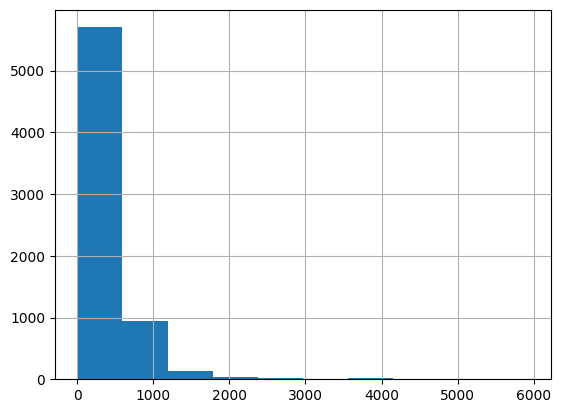

In [24]:
import tiktoken

model = "gpt-4"

encoding = tiktoken.encoding_for_model(model)

def func(text):
    return len(encoding.encode(text))

temp = pd.read_csv('Generated_data.csv')
temp['Câu trả lời đúng'].apply(func).hist()

<Axes: >

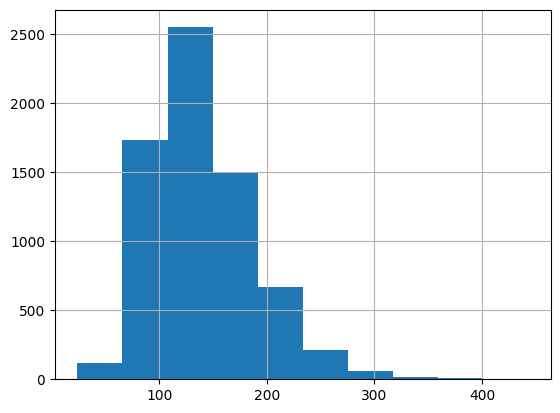

In [23]:
temp['Câu trả lời bịa đặt'].apply(func).hist()